In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

import warnings
warnings.filterwarnings('ignore')

train_clinical_data = pd.read_csv("train_clinical_data.csv")
train_peptides = pd.read_csv("train_peptides.csv")
train_protiens = pd.read_csv("train_proteins.csv")
supplemental_clinical_data = pd.read_csv("supplemental_clinical_data.csv")

In [2]:
train_clinical_data

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On
...,...,...,...,...,...,...,...,...
2610,65043_48,65043,48,7.0,6.0,13.0,0.0,Off
2611,65043_54,65043,54,4.0,8.0,11.0,1.0,Off
2612,65043_60,65043,60,6.0,6.0,16.0,1.0,Off
2613,65043_72,65043,72,3.0,9.0,14.0,1.0,Off


In [3]:
print(": Found {:,d} unique patient_id values".format(train_clinical_data["patient_id"].nunique()))
print(": Found {:,d} unique visit_month values".format(train_clinical_data["visit_month"].nunique()))

: Found 248 unique patient_id values
: Found 17 unique visit_month values


In [4]:
train_peptides

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.30
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.00
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.00
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.90
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.70
...,...,...,...,...,...,...
981829,58648_108,108,58648,Q9UHG2,ILAGSADSEGVAAPR,202820.00
981830,58648_108,108,58648,Q9UKV8,SGNIPAGTTVDTK,105830.00
981831,58648_108,108,58648,Q9Y646,LALLVDTVGPR,21257.60
981832,58648_108,108,58648,Q9Y6R7,AGC(UniMod_4)VAESTAVC(UniMod_4)R,5127.26


In [5]:
print(": Found {:,d} unique patient_id values".format(train_peptides["patient_id"].nunique()))
print(": Found {:,d} unique UniProt values".format(train_peptides["UniProt"].nunique()))
print(": Found {:,d} unique Peptide values".format(train_peptides["Peptide"].nunique()))

: Found 248 unique patient_id values
: Found 227 unique UniProt values
: Found 968 unique Peptide values


In [6]:
train_protiens

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8
3,55_0,0,55,O14498,41526.9
4,55_0,0,55,O14773,31238.0
...,...,...,...,...,...
232736,58648_108,108,58648,Q9UBX5,27387.8
232737,58648_108,108,58648,Q9UHG2,369437.0
232738,58648_108,108,58648,Q9UKV8,105830.0
232739,58648_108,108,58648,Q9Y646,21257.6


In [7]:
print(": Found {:,d} unique patient_id values".format(train_protiens["patient_id"].nunique()))
print(": Found {:,d} unique visit_month values".format(train_protiens["visit_month"].nunique()))
print(": Found {:,d} unique UniProt values".format(train_protiens["UniProt"].nunique()))

: Found 248 unique patient_id values
: Found 15 unique visit_month values
: Found 227 unique UniProt values


In [8]:
supplemental_clinical_data

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,35_0,35,0,5.0,3.0,16.0,0.0,NaN
1,35_36,35,36,6.0,4.0,20.0,0.0,NaN
2,75_0,75,0,4.0,6.0,26.0,0.0,NaN
3,75_36,75,36,1.0,8.0,38.0,0.0,On
4,155_0,155,0,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
2218,65382_0,65382,0,NaN,NaN,0.0,NaN,NaN
2219,65405_0,65405,0,5.0,16.0,31.0,0.0,NaN
2220,65405_5,65405,5,NaN,NaN,57.0,NaN,NaN
2221,65530_0,65530,0,10.0,6.0,24.0,0.0,NaN


In [9]:
print(": Found {:,d} unique patient_id values".format(supplemental_clinical_data["patient_id"].nunique()))
print(": Found {:,d} unique visit_month values".format(supplemental_clinical_data["visit_month"].nunique()))

: Found 771 unique patient_id values
: Found 8 unique visit_month values


In [10]:
combined = pd.concat([train_clinical_data, supplemental_clinical_data]).reset_index(drop=True)
combined

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On
...,...,...,...,...,...,...,...,...
4833,65382_0,65382,0,NaN,NaN,0.0,NaN,NaN
4834,65405_0,65405,0,5.0,16.0,31.0,0.0,NaN
4835,65405_5,65405,5,NaN,NaN,57.0,NaN,NaN
4836,65530_0,65530,0,10.0,6.0,24.0,0.0,NaN


In [11]:
print(": Found {:,d} unique patient_id values".format(combined["patient_id"].nunique()))
print(": Found {:,d} unique visit_month values".format(combined["visit_month"].nunique()))

: Found 1,019 unique patient_id values
: Found 18 unique visit_month values


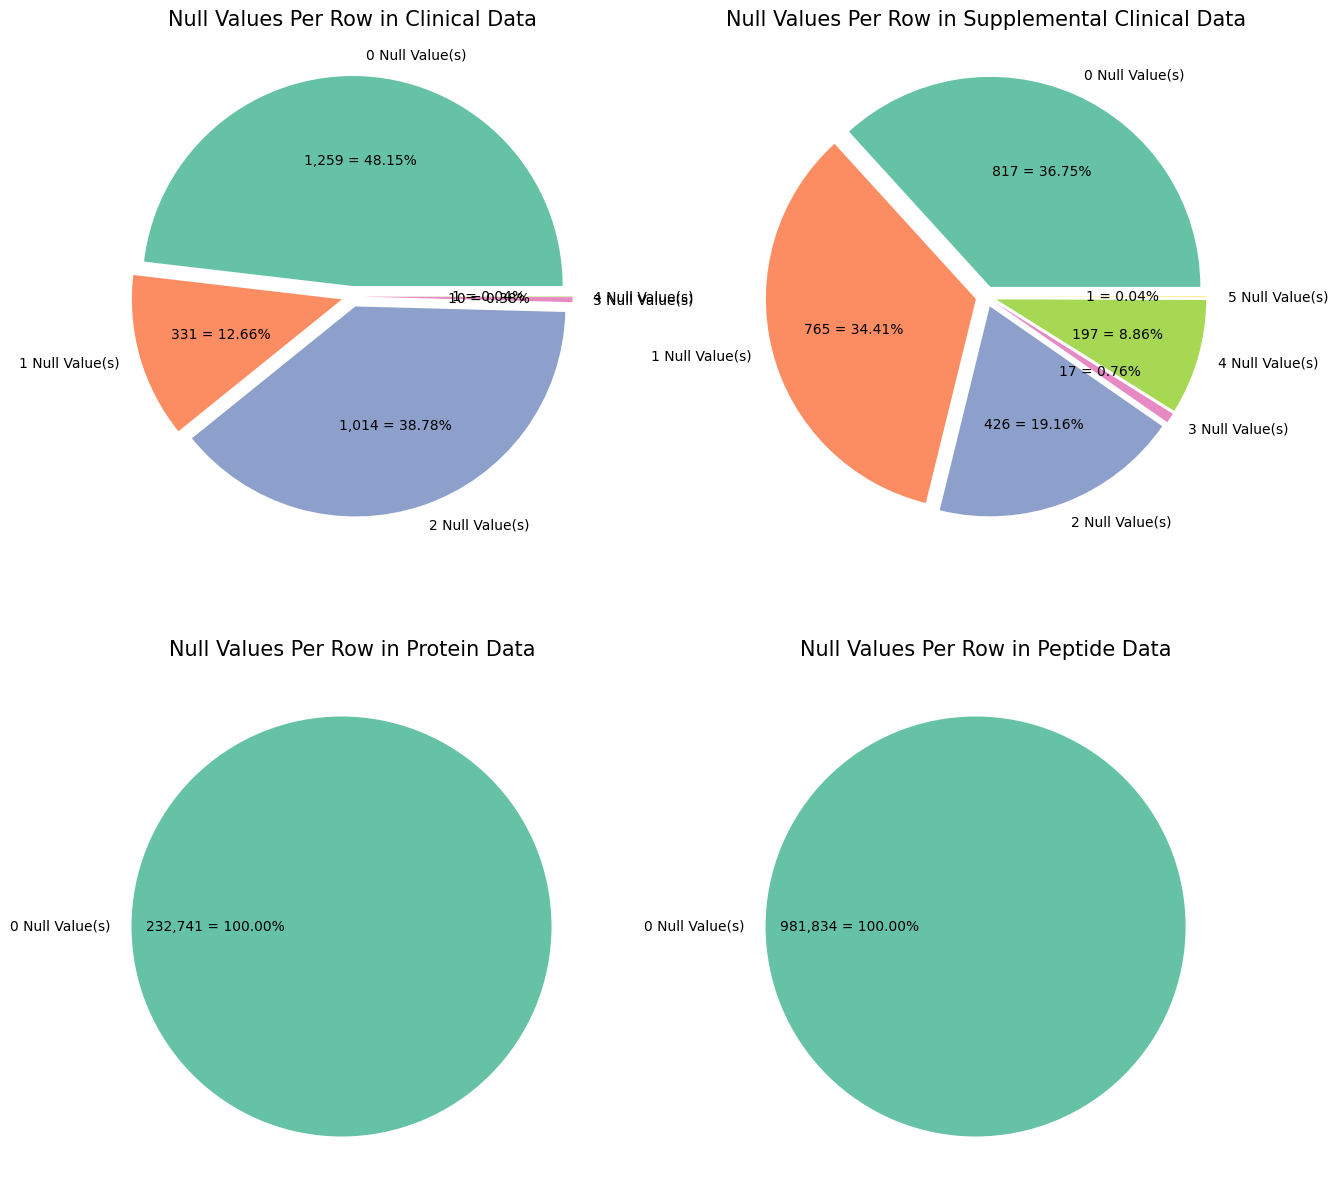

In [12]:
train_clinical_data["null_count"] = train_clinical_data.isnull().sum(axis=1)
counts_train_clinical_data = train_clinical_data.groupby("null_count")["visit_id"].count().to_dict()
null_train_clinical_data = {"{} Null Value(s)".format(k) : v for k, v in counts_train_clinical_data.items()}

train_peptides["null_count"] = train_peptides.isnull().sum(axis=1)
counts_train_peptides = train_peptides.groupby("null_count")["visit_id"].count().to_dict()
null_train_peptides = {"{} Null Value(s)".format(k) : v for k, v in counts_train_peptides.items()}

train_protiens["null_count"] = train_protiens.isnull().sum(axis=1)
counts_train_protiens = train_protiens.groupby("null_count")["visit_id"].count().to_dict()
null_train_protiens = {"{} Null Value(s)".format(k) : v for k, v in counts_train_protiens.items()}

supplemental_clinical_data["null_count"] = supplemental_clinical_data.isnull().sum(axis=1)
counts_supplemental_clinical_data = supplemental_clinical_data.groupby("null_count")["visit_id"].count().to_dict()
null_supplemental_clinical_data = {"{} Null Value(s)".format(k) : v for k, v in counts_supplemental_clinical_data.items()}

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

axs = axs.flatten()

_ = axs[0].pie(
    x=list(null_train_clinical_data.values()), 
    autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(null_train_clinical_data.values())/100, x),
    explode=[0.05] * len(null_train_clinical_data.keys()), 
    labels=null_train_clinical_data.keys(), 
    colors=sns.color_palette("Set2")[0:len(null_train_clinical_data.keys())],
)
_ = axs[0].set_title("Null Values Per Row in Clinical Data", fontsize=15)

_ = axs[3].pie(
    x=list(null_train_peptides.values()), 
    autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(null_train_peptides.values())/100, x),
    explode=[0.05] * len(null_train_peptides.keys()), 
    labels=null_train_peptides.keys(), 
    colors=sns.color_palette("Set2")[0:len(null_train_peptides.keys())],
)
_ = axs[3].set_title("Null Values Per Row in Peptide Data", fontsize=15)

_ = axs[2].pie(
    x=list(null_train_protiens.values()), 
    autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(null_train_protiens.values())/100, x),
    explode=[0.05] * len(null_train_protiens.keys()), 
    labels=null_train_protiens.keys(), 
    colors=sns.color_palette("Set2")[0:len(null_train_protiens.keys())],
)
_ = axs[2].set_title("Null Values Per Row in Protein Data", fontsize=15)

_ = axs[1].pie(
    x=list(null_supplemental_clinical_data.values()), 
    autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(null_supplemental_clinical_data.values())/100, x),
    explode=[0.05] * len(null_supplemental_clinical_data.keys()), 
    labels=null_supplemental_clinical_data.keys(), 
    colors=sns.color_palette("Set2")[0:len(null_supplemental_clinical_data.keys())],
)
_ = axs[1].set_title("Null Values Per Row in Supplemental Clinical Data", fontsize=15)

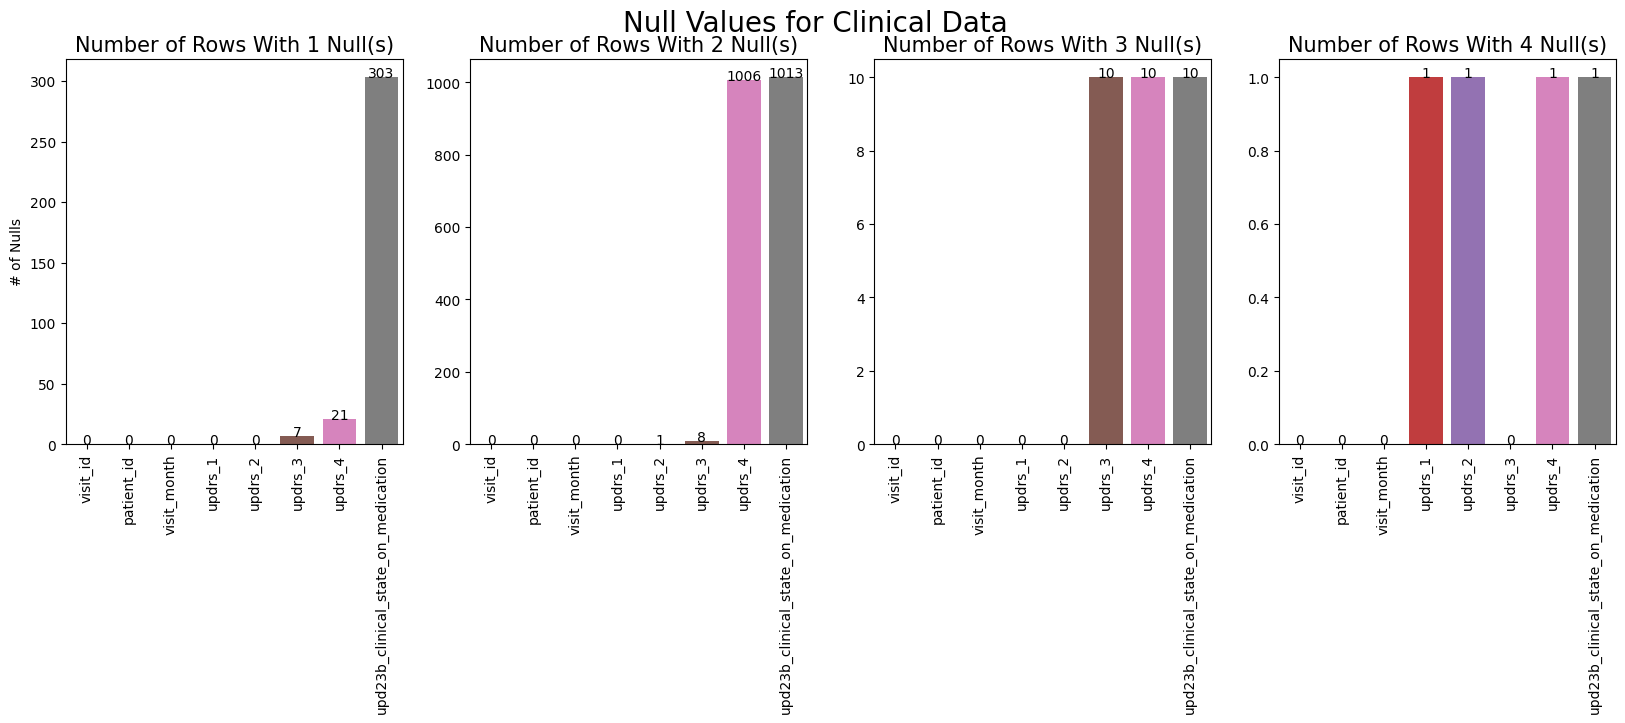

In [13]:
null_count_labels = [train_clinical_data[(train_clinical_data["null_count"] == x)].isnull().sum().index[:-1] for x in range(1, 6)]
null_count_values = [train_clinical_data[(train_clinical_data["null_count"] == x)].isnull().sum().values[:-1] for x in range(1, 6)]

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
fig.suptitle("Null Values for Clinical Data", fontsize=20)

axs = axs.flatten()

for x in range(0, 4):
    ax = axs[x]
    labels = null_count_labels[x]
    _ = sns.barplot(x=labels, y=null_count_values[x], ax=ax)
    _ = ax.set_title("Number of Rows With {} Null(s)".format(x + 1), fontsize=15)
    _ = ax.set_ylabel("# of Nulls" if x == 0 else "")
    _ = ax.set_xlabel("")
    _ = ax.set_xticks([z for z in range(len(labels))], labels, rotation=90)
    for p in ax.patches:
        height = p.get_height()
        ax.text(x=p.get_x()+(p.get_width()/2), y=height, s="{:d}".format(int(height)), ha="center")

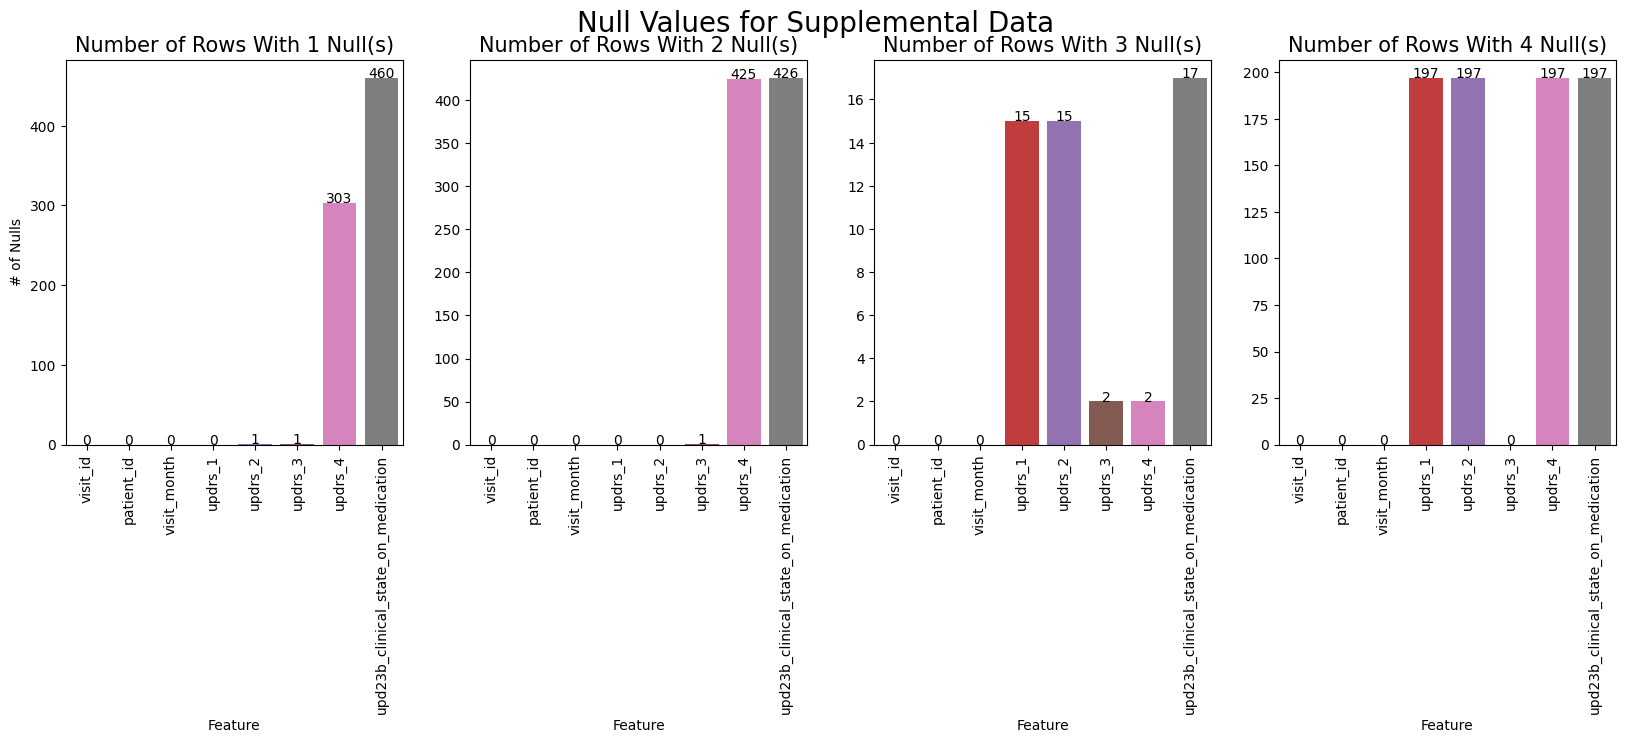

In [14]:
null_count_labels = [supplemental_clinical_data[(supplemental_clinical_data["null_count"] == x)].isnull().sum().index[:-1] for x in range(1, 6)]
null_count_values = [supplemental_clinical_data[(supplemental_clinical_data["null_count"] == x)].isnull().sum().values[:-1] for x in range(1, 6)]

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
fig.suptitle("Null Values for Supplemental Data", fontsize=20)

axs = axs.flatten()

for x in range(0, 4):
    ax = axs[x]
    labels = null_count_labels[x]
    _ = sns.barplot(x=labels, y=null_count_values[x], ax=ax)
    _ = ax.set_title("Number of Rows With {} Null(s)".format(x + 1), fontsize=15)
    _ = ax.set_ylabel("# of Nulls" if x == 0 else "")
    _ = ax.set_xlabel("Feature")
    _ = ax.set_xticks([z for z in range(len(labels))], labels, rotation=90)
    for p in ax.patches:
        height = p.get_height()
        ax.text(x=p.get_x()+(p.get_width()/2), y=height, s="{:d}".format(int(height)), ha="center")

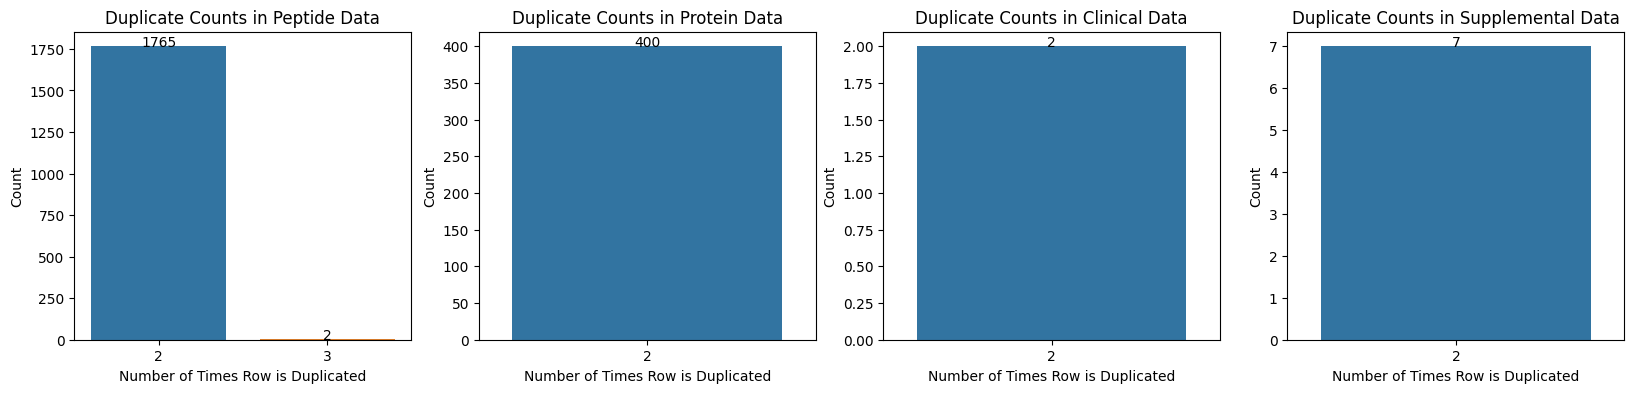

In [15]:
titles = ["Peptide Data", "Protein Data", "Clinical Data", "Supplemental Data"]
value_counts = []
duplicates = train_peptides.pivot_table(index=[
    'UniProt', 'Peptide', 'PeptideAbundance',
], aggfunc="size")
unique, counts = np.unique(duplicates, return_counts=True)
value_counts.append(dict(zip(unique, counts)))

duplicates = train_protiens.pivot_table(index=[
    'UniProt', 'NPX',
], aggfunc="size")
unique, counts = np.unique(duplicates, return_counts=True)
value_counts.append(dict(zip(unique, counts)))

duplicates = train_clinical_data.pivot_table(index=[
    'visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4', 'upd23b_clinical_state_on_medication'
], aggfunc="size")
unique, counts = np.unique(duplicates, return_counts=True)
value_counts.append(dict(zip(unique, counts)))

duplicates = supplemental_clinical_data.pivot_table(index=[
    'visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4', 'upd23b_clinical_state_on_medication'
], aggfunc="size")
unique, counts = np.unique(duplicates, return_counts=True)
value_counts.append(dict(zip(unique, counts)))

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

axs = axs.flatten()

for x in range(4):
    ax = axs[x]
    _ = sns.barplot(x=list(value_counts[x].keys())[1:], y=list(value_counts[x].values())[1:], ax=ax)
    _ = ax.set_title("Duplicate Counts in {}".format(titles[x], fontsize=15))
    _ = ax.set_ylabel("Count")
    _ = ax.set_xlabel("Number of Times Row is Duplicated")
    for p in ax.patches:
        height = p.get_height()
        ax.text(x=p.get_x()+(p.get_width()/2), y=height, s="{:d}".format(int(height)), ha="center")


In [16]:
features = [
    'visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4',
]

train_clinical_data[features].describe().T.style.bar(subset=['mean'], color='#7BCC70')\
    .background_gradient(subset=['std'], cmap='Reds')\
    .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
visit_month,2615.000000,31.190822,25.199053,0.000000,10.500000,24.000000,48.000000,108.000000
updrs_1,2614.000000,7.110559,5.525955,0.000000,3.000000,6.000000,10.000000,33.000000
updrs_2,2613.000000,6.743590,6.323230,0.000000,1.000000,5.000000,10.000000,40.000000
updrs_3,2590.000000,19.421236,15.000289,0.000000,6.000000,19.000000,29.000000,86.000000
updrs_4,1577.000000,1.861763,3.022112,0.000000,0.000000,0.000000,3.000000,20.000000


In [17]:
features = [
    'visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4',
]

supplemental_clinical_data[features].describe().T.style.bar(subset=['mean'], color='#7BCC70')\
    .background_gradient(subset=['std'], cmap='Reds')\
    .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
visit_month,2223.000000,12.910481,13.060532,0.000000,0.000000,6.000000,24.000000,36.000000
updrs_1,2010.000000,5.684080,4.366964,0.000000,2.000000,5.000000,8.000000,27.000000
updrs_2,2009.000000,6.507715,4.968132,0.000000,2.000000,5.000000,10.000000,34.000000
updrs_3,2218.000000,22.917944,12.342596,0.000000,14.000000,22.000000,31.000000,72.000000
updrs_4,1295.000000,0.840154,1.860247,0.000000,0.000000,0.000000,0.000000,12.000000


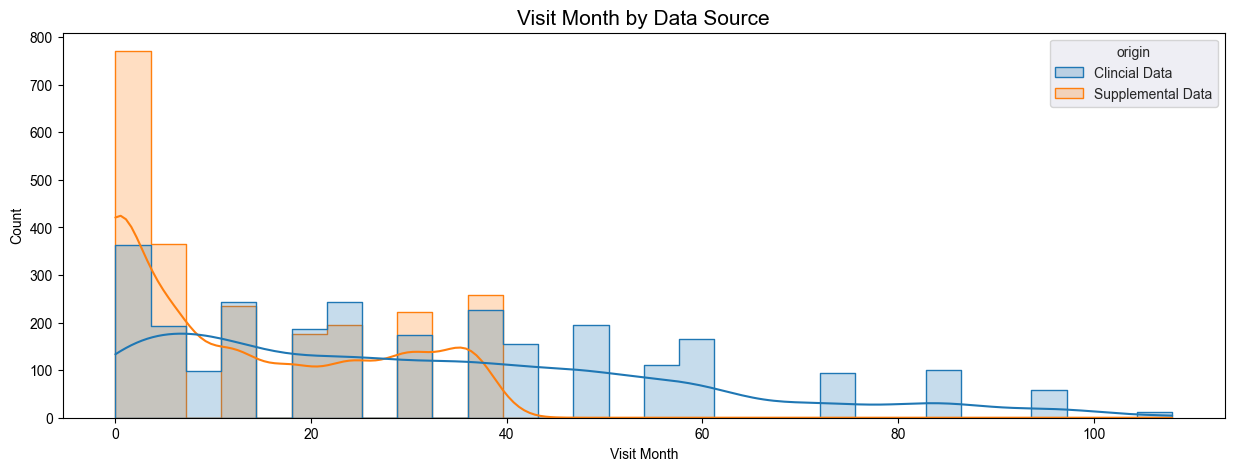

In [18]:
train_clinical_data["origin"] = "Clincial Data"
supplemental_clinical_data["origin"] = "Supplemental Data"

combined = pd.concat([train_clinical_data, supplemental_clinical_data]).reset_index(drop=True)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

sns.set_style('darkgrid')

_ = sns.histplot(data=combined, x="visit_month", hue="origin", kde=True, ax=ax, element="step")
_ = ax.set_title("Visit Month by Data Source", fontsize=15)
_ = ax.set_ylabel("Count")
_ = ax.set_xlabel("Visit Month")

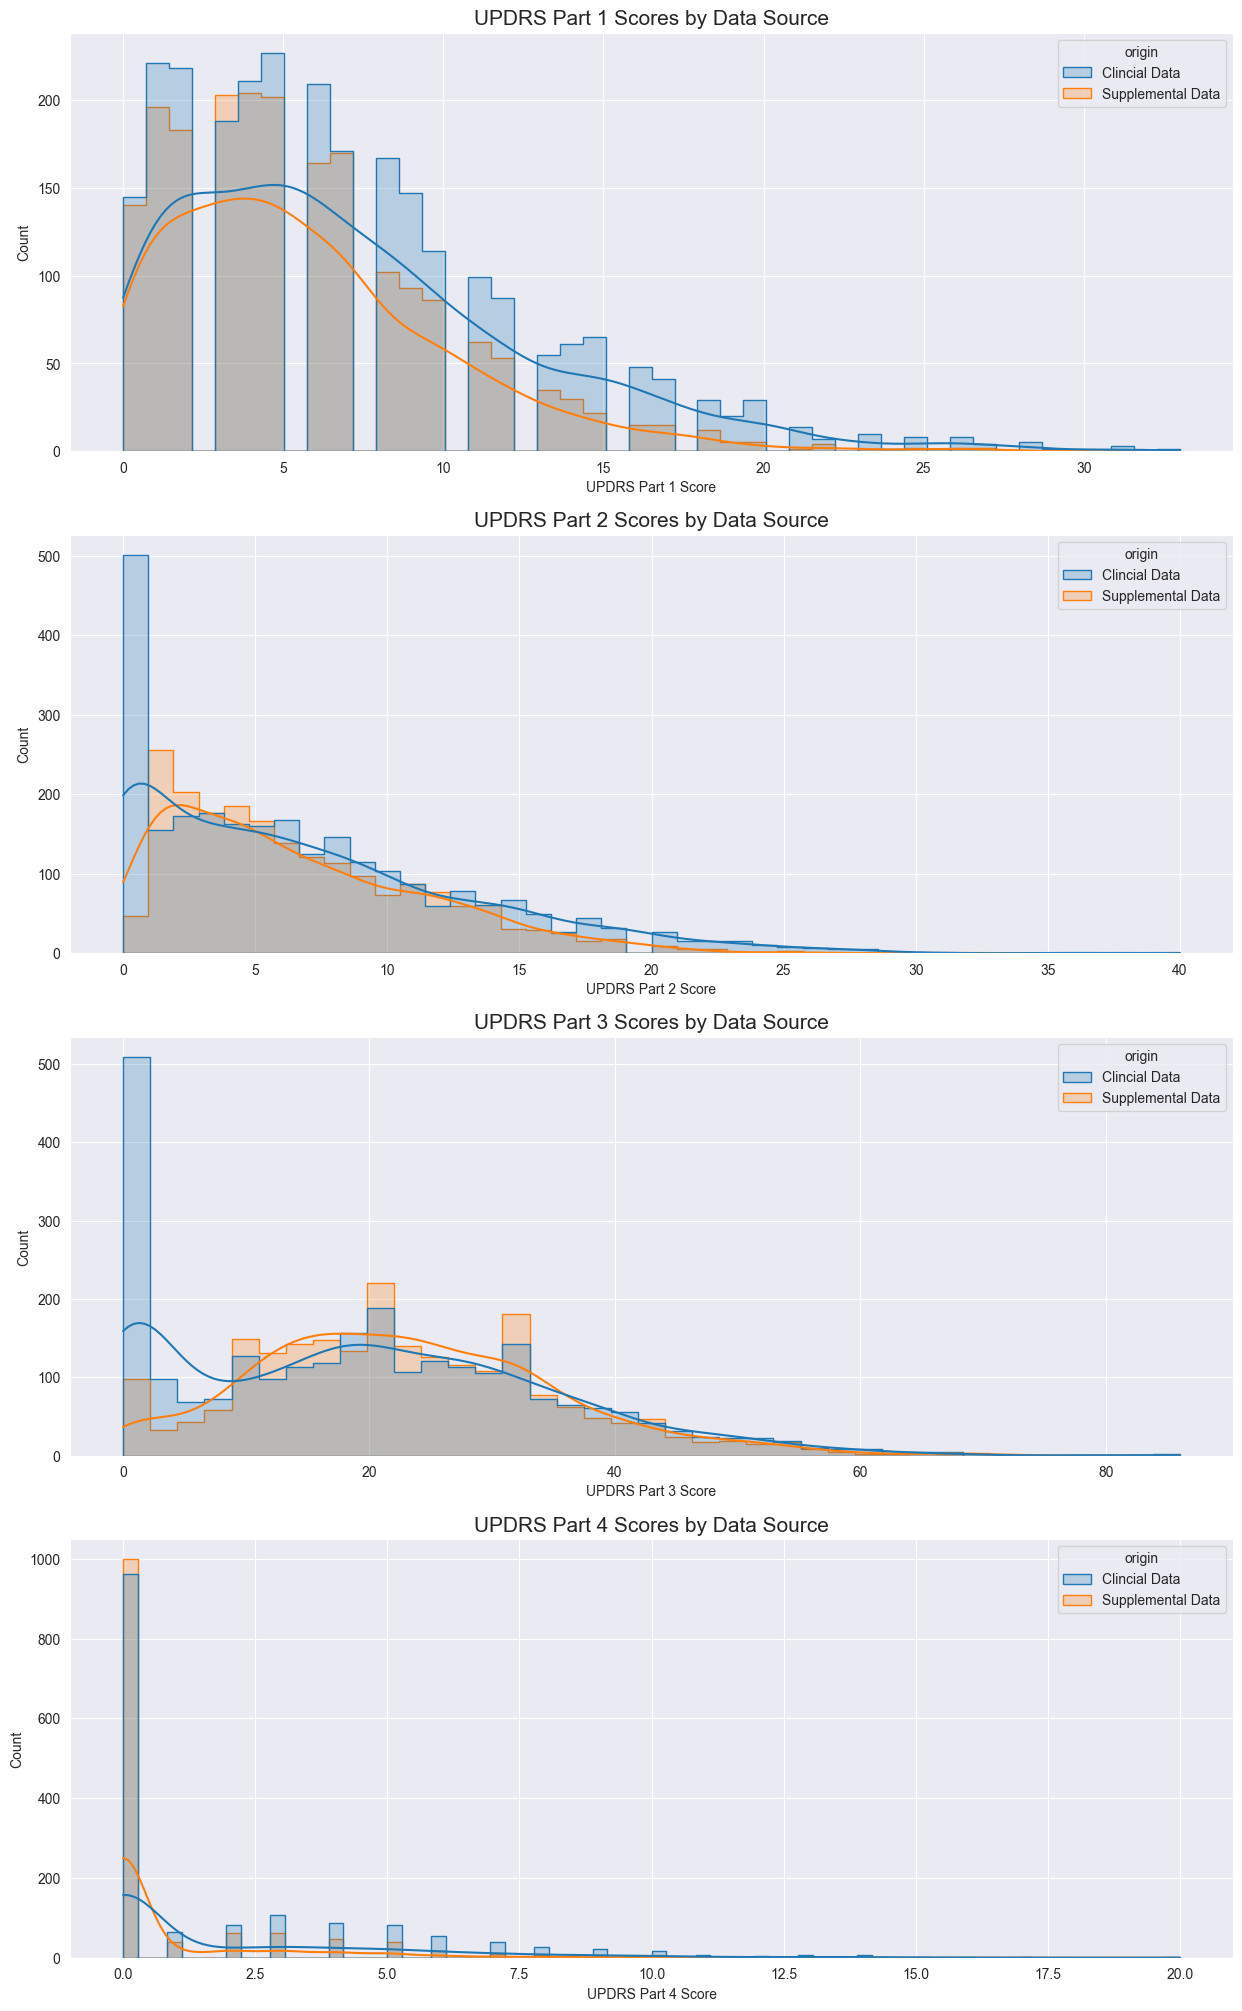

In [19]:
train_clinical_data["origin"] = "Clincial Data"
supplemental_clinical_data["origin"] = "Supplemental Data"

combined = pd.concat([train_clinical_data, supplemental_clinical_data]).reset_index(drop=True)

features = ["updrs_1", "updrs_2", "updrs_3", "updrs_4"]
labels = ["UPDRS Part 1", "UPDRS Part 2", "UPDRS Part 3", "UPDRS Part 4"]

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15, 25))

sns.set_style('darkgrid')

axs = axs.flatten()

sns.set_style('darkgrid')

for x, feature in enumerate(features):
    ax = axs[x]
    _ = sns.histplot(data=combined, x=feature, hue="origin", kde=True, ax=ax, element="step")
    _ = ax.set_title("{} Scores by Data Source".format(labels[x]), fontsize=15)
    _ = ax.set_ylabel("Count")
    _ = ax.set_xlabel("{} Score".format(labels[x]))

-------> Fold 1 <--------
: AUC ROC = 0.93284295239891
-------> Fold 2 <--------
: AUC ROC = 0.9443979556368038
-------> Fold 3 <--------
: AUC ROC = 0.927000150024647
-------> Fold 4 <--------
: AUC ROC = 0.9435134052227236
-------> Fold 5 <--------
: AUC ROC = 0.9532604768786127
--> Overall results for out of fold predictions
: AUC ROC = 0.9389806206451068


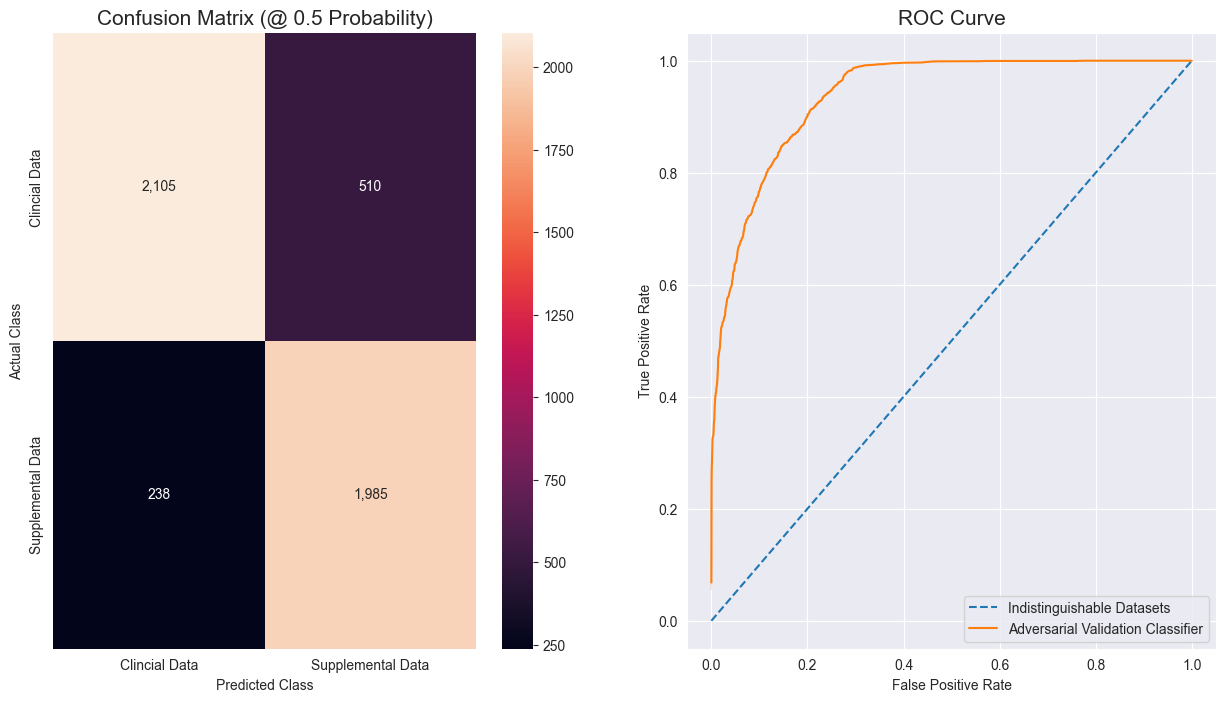

In [20]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
from lightgbm import early_stopping, log_evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder

train_clinical_data["origin"] = 0
supplemental_clinical_data["origin"] = 1

combined = pd.concat([train_clinical_data, supplemental_clinical_data]).reset_index(drop=True)

features = [
    'visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4', 'upd23b_clinical_state_on_medication',
]

le = LabelEncoder()
combined['upd23b_clinical_state_on_medication'] = le.fit_transform(combined['upd23b_clinical_state_on_medication'])
    
n_folds = 5
skf = KFold(n_splits=n_folds, random_state=2023, shuffle=True)
train_oof_preds = np.zeros((combined.shape[0],))
train_oof_probas = np.zeros((combined.shape[0],))

for fold, (train_index, test_index) in enumerate(skf.split(combined, combined["origin"])):
    print("-------> Fold {} <--------".format(fold + 1))
    x_train, x_valid = pd.DataFrame(combined.iloc[train_index]), pd.DataFrame(combined.iloc[test_index])
    y_train, y_valid = combined["origin"].iloc[train_index], combined["origin"].iloc[test_index]
    
    x_train_features = pd.DataFrame(x_train[features])
    x_valid_features = pd.DataFrame(x_valid[features])

    model = LGBMClassifier(
        random_state=2023,
        objective="binary",
        metric="auc",
        n_jobs=-1,
        n_estimators=2000,
        verbose=-1,  
        max_depth=3,
    )
    model.fit(
        x_train_features[features], 
        y_train,
        eval_set=[(x_valid_features[features], y_valid)],
        callbacks=[
            early_stopping(50, verbose=False),
            log_evaluation(2000),
        ]
    )
    oof_preds = model.predict(x_valid_features[features])
    oof_probas = model.predict_proba(x_valid_features[features])[:,1]
    train_oof_preds[test_index] = oof_preds
    train_oof_probas[test_index] = oof_probas
    print(": AUC ROC = {}".format(roc_auc_score(y_valid, oof_probas)))
    
auc_vanilla = roc_auc_score(combined["origin"], train_oof_probas)
fpr, tpr, _ = roc_curve(combined["origin"], train_oof_probas)
print("--> Overall results for out of fold predictions")
print(": AUC ROC = {}".format(auc_vanilla))

confusion = confusion_matrix(combined["origin"], train_oof_preds)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

labels = ["Clincial Data", "Supplemental Data"]

_ = sns.heatmap(confusion, annot=True, fmt=",d", ax=axs[0], xticklabels=labels, yticklabels=labels)
_ = axs[0].set_title("Confusion Matrix (@ 0.5 Probability)", fontsize=15)
_ = axs[0].set_ylabel("Actual Class")
_ = axs[0].set_xlabel("Predicted Class")

_ = sns.lineplot(x=[0, 1], y=[0, 1], linestyle="--", label="Indistinguishable Datasets", ax=axs[1])
_ = sns.lineplot(x=fpr, y=tpr, ax=axs[1], label="Adversarial Validation Classifier")
_ = axs[1].set_title("ROC Curve", fontsize=15)
_ = axs[1].set_xlabel("False Positive Rate")
_ = axs[1].set_ylabel("True Positive Rate")

In [21]:
train_protiens[["NPX"]].describe().T.style.bar(subset=['mean'], color='#7BCC70')\
    .background_gradient(subset=['std'], cmap='Reds')\
    .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
NPX,232741.000000,2712076.943823,22241547.317363,84.608200,29464.400000,113556.000000,563894.000000,613851000.000000


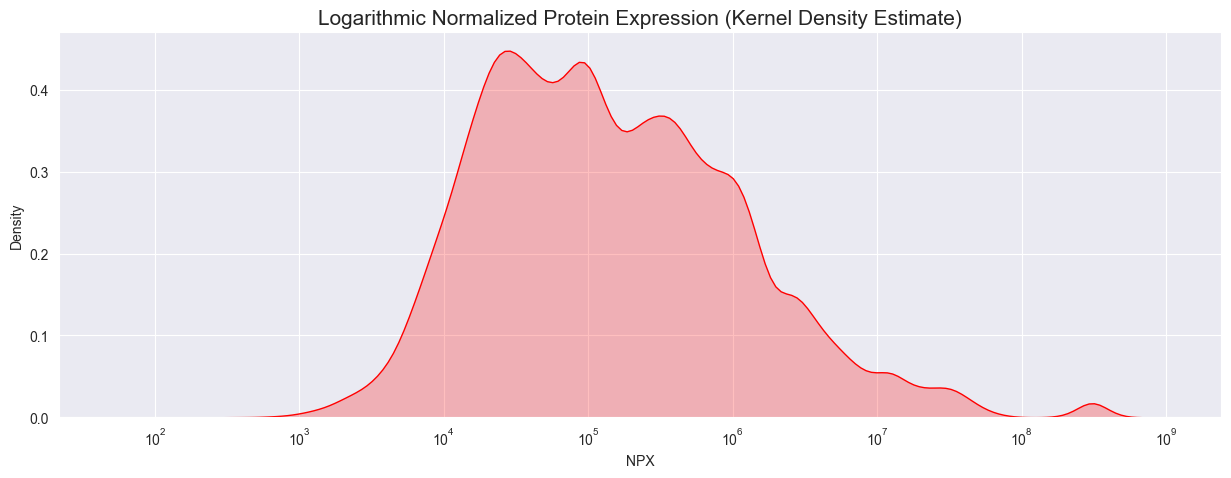

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

sns.set_style('darkgrid')

_ = sns.kdeplot(train_protiens["NPX"], shade=True, color="r", ax=ax, label="Normalized Protein Expression", log_scale=True)
_ = ax.set_title("Logarithmic Normalized Protein Expression (Kernel Density Estimate)", fontsize=15)

In [23]:
train_peptides[["PeptideAbundance"]].describe().T.style.bar(subset=['mean'], color='#7BCC70')\
    .background_gradient(subset=['std'], cmap='Reds')\
    .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
PeptideAbundance,981834.000000,642890.245933,3377989.092586,10.998500,28174.250000,74308.300000,221338.750000,178752000.000000


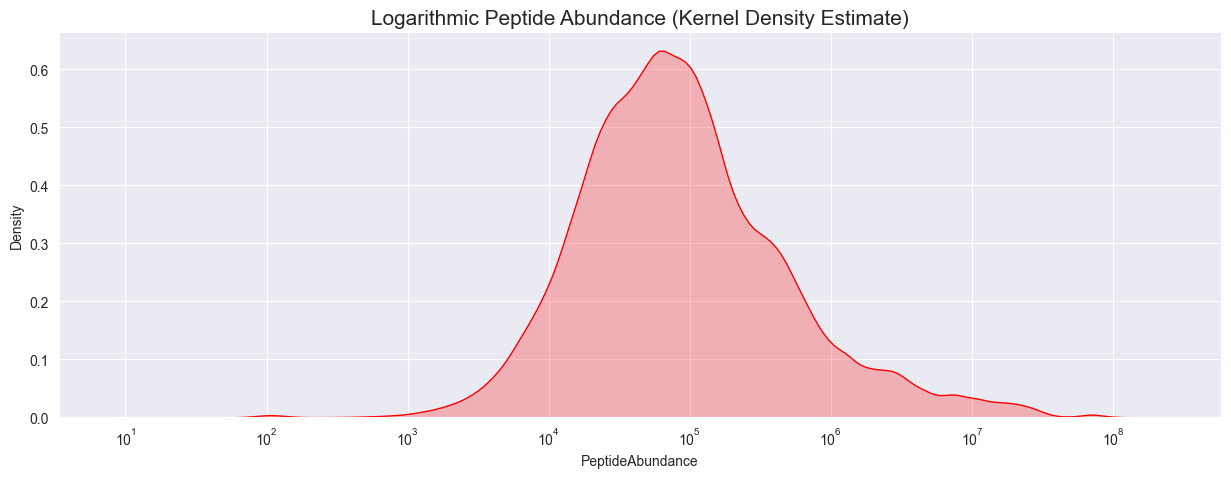

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

sns.set_style('darkgrid')

_ = sns.kdeplot(train_peptides["PeptideAbundance"], shade=True, color="r", ax=ax, label="Peptide Abundance", log_scale=True)
_ = ax.set_title("Logarithmic Peptide Abundance (Kernel Density Estimate)", fontsize=15)

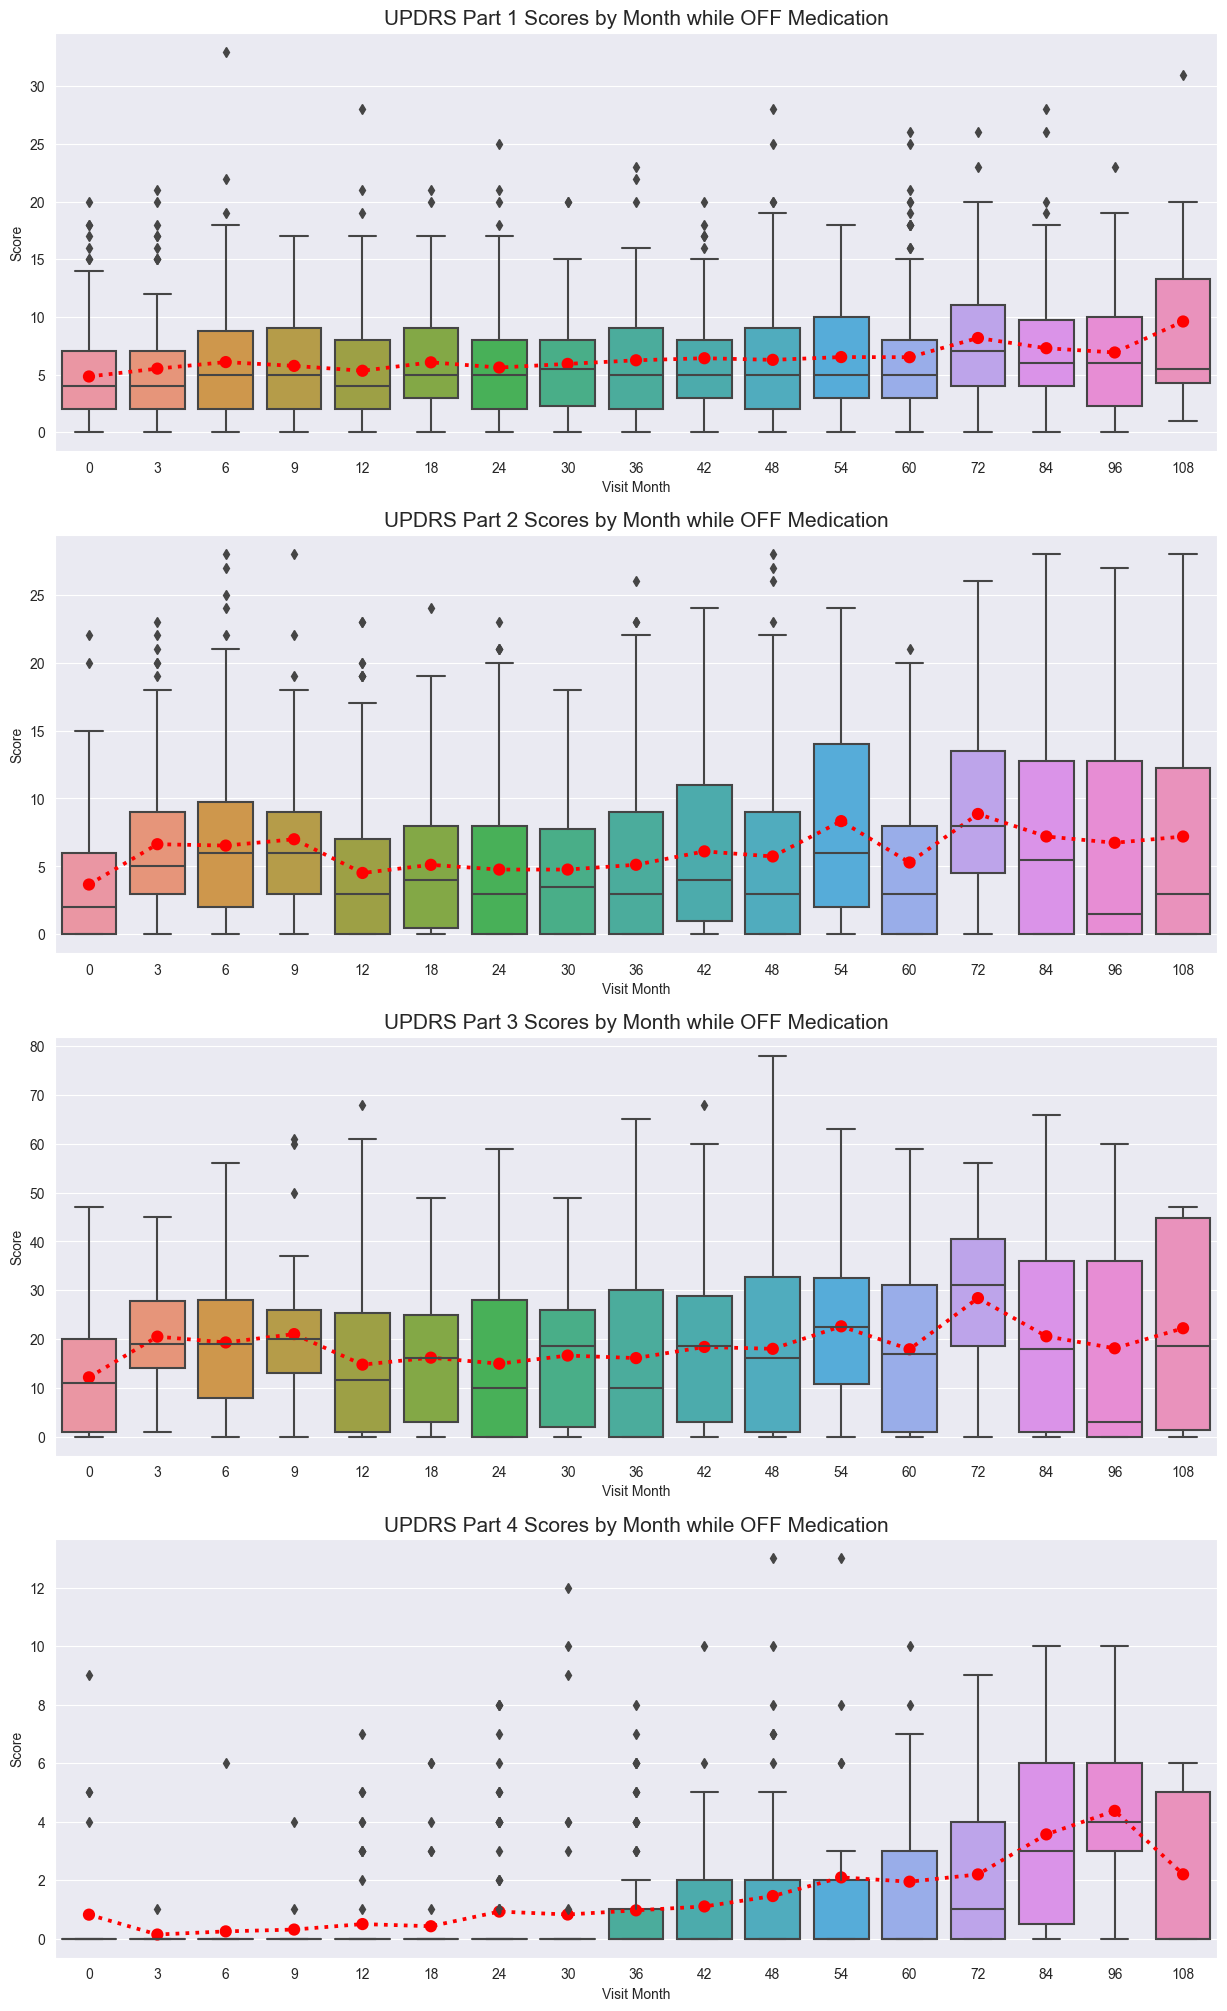

In [25]:
train_clincial_data_copy = train_clinical_data.copy()
train_clincial_data_copy["upd23b_clinical_state_on_medication"] = train_clincial_data_copy["upd23b_clinical_state_on_medication"].fillna("Off")

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15, 25))

sns.set_style('darkgrid')

axs = axs.flatten()

for x, feature in enumerate(["updrs_1", "updrs_2", "updrs_3", "updrs_4"]):
    ax = axs[x]
    data = train_clincial_data_copy[(train_clincial_data_copy["upd23b_clinical_state_on_medication"] == "Off")]
    _ = sns.boxplot(data=data, x="visit_month", y=feature, ax=ax)
    _ = sns.pointplot(data=data, x="visit_month", y=feature, color="r", ci=None, linestyles=[":"], ax=ax)
    _ = ax.set_title("UPDRS Part {} Scores by Month while OFF Medication".format(x+1), fontsize=15)
    _ = ax.set_xlabel("Visit Month")
    _ = ax.set_ylabel("Score")

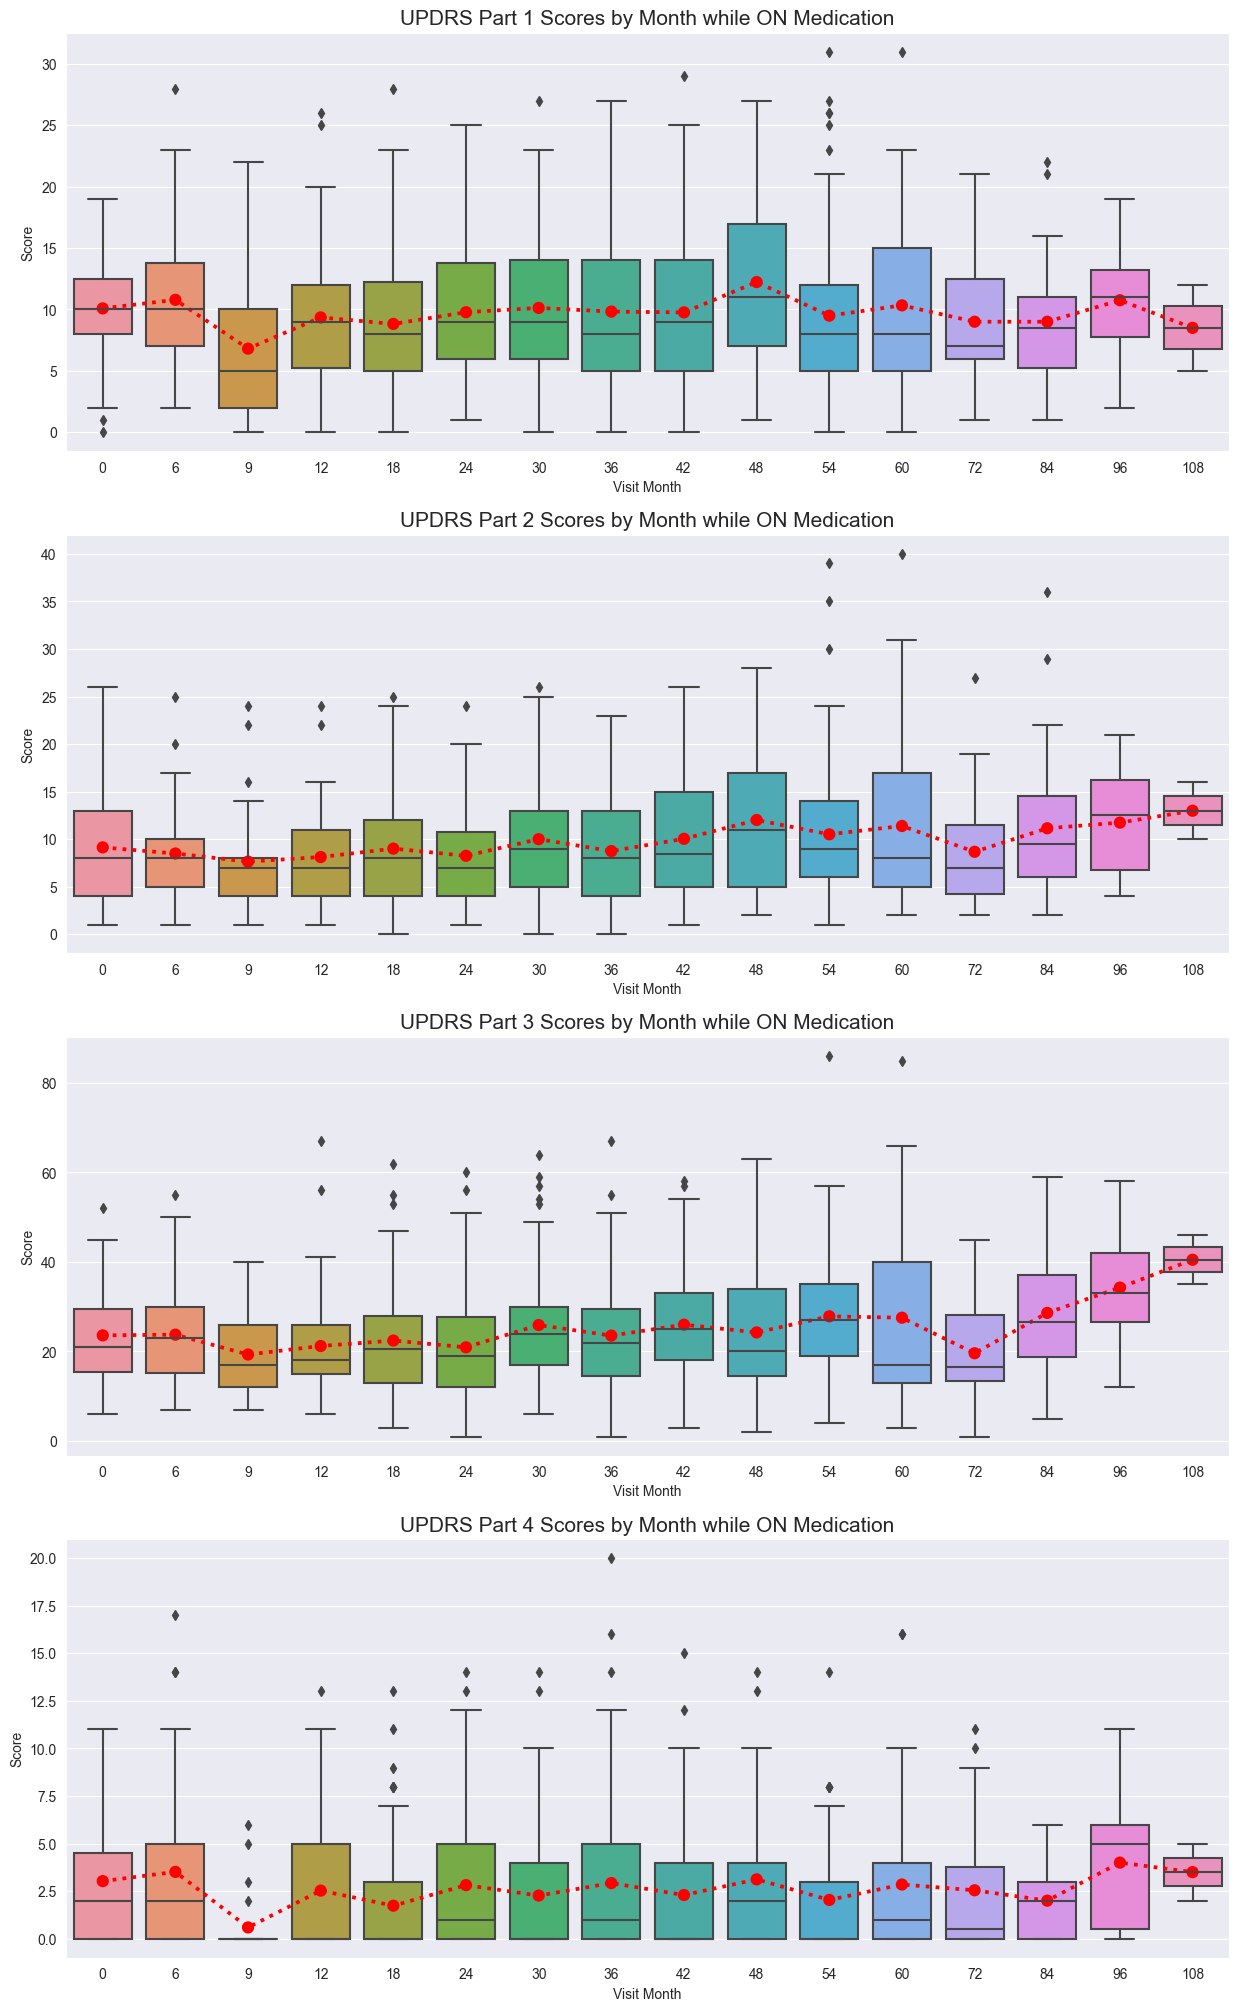

In [26]:
train_clincial_data_copy = train_clinical_data.copy()
train_clincial_data_copy["upd23b_clinical_state_on_medication"] = train_clincial_data_copy["upd23b_clinical_state_on_medication"].fillna("Off")

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15, 25))

sns.set_style('darkgrid')

axs = axs.flatten()

for x, feature in enumerate(["updrs_1", "updrs_2", "updrs_3", "updrs_4"]):
    ax = axs[x]
    data = train_clincial_data_copy[(train_clincial_data_copy["upd23b_clinical_state_on_medication"] == "On")]
    _ = sns.boxplot(data=data, x="visit_month", y=feature, ax=ax)
    _ = sns.pointplot(data=data, x="visit_month", y=feature, color="r", ci=None, linestyles=[":"], ax=ax)
    _ = ax.set_title("UPDRS Part {} Scores by Month while ON Medication".format(x+1), fontsize=15)
    _ = ax.set_xlabel("Visit Month")
    _ = ax.set_ylabel("Score")

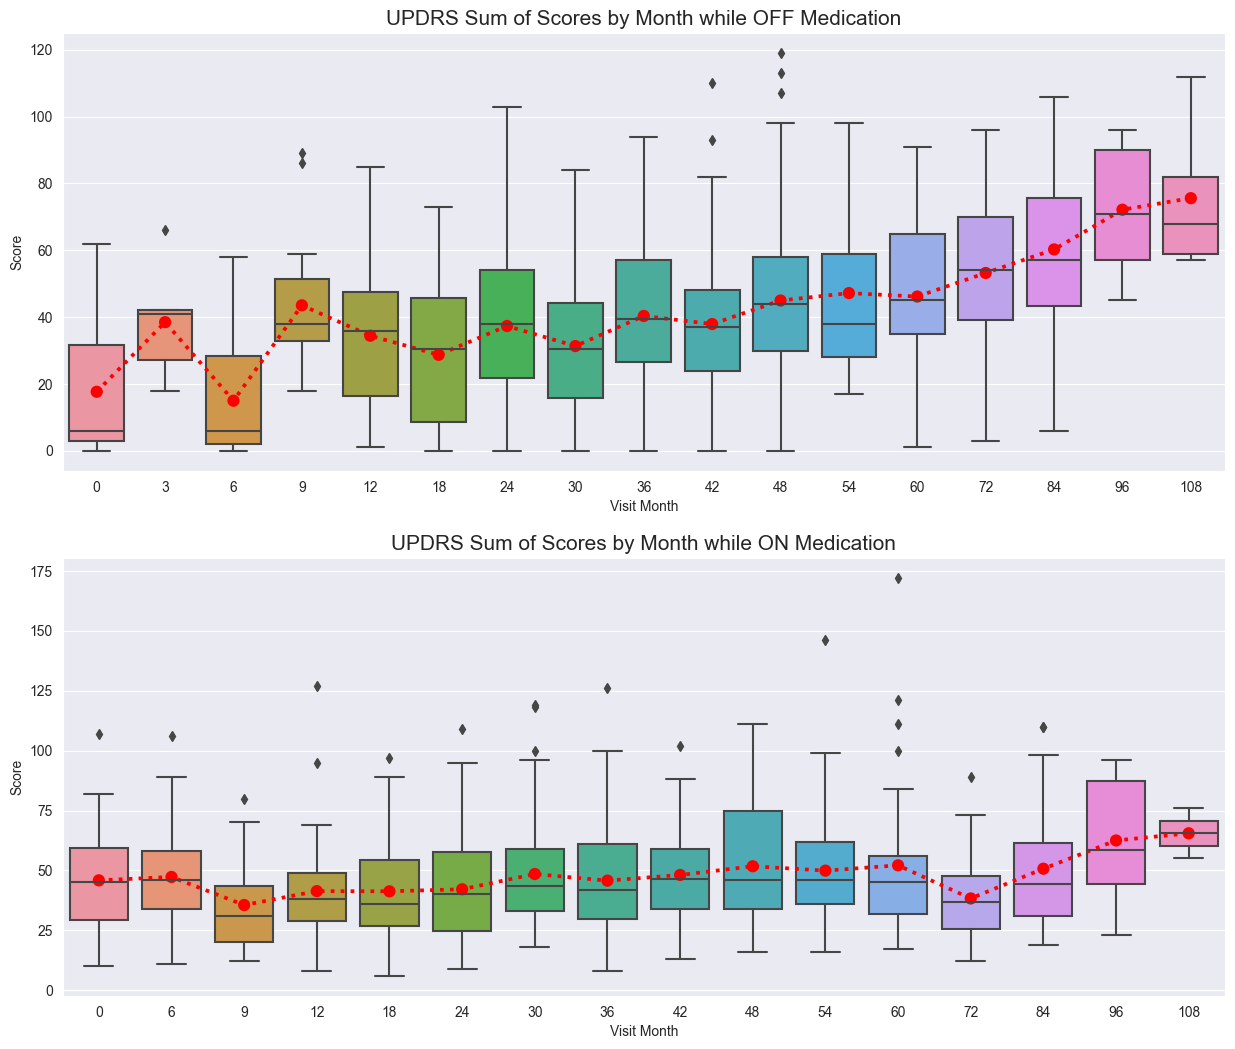

In [27]:
train_clinical_data["updrs_sum"] = train_clinical_data["updrs_1"] + train_clinical_data["updrs_2"] + train_clinical_data["updrs_3"] + train_clinical_data["updrs_4"]
train_clincial_data_copy = train_clinical_data.copy()
train_clincial_data_copy["upd23b_clinical_state_on_medication"] = train_clincial_data_copy["upd23b_clinical_state_on_medication"].fillna("Off")

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 12.5))

axs = axs.flatten()

sns.set_style('darkgrid')

data = train_clincial_data_copy[(train_clincial_data_copy["upd23b_clinical_state_on_medication"] == "Off")]
ax = axs[0]
_ = sns.boxplot(data=data, x="visit_month", y="updrs_sum", ax=ax)
_ = sns.pointplot(data=data, x="visit_month", y="updrs_sum", color="r", ci=None, linestyles=[":"], ax=ax)
_ = ax.set_title("UPDRS Sum of Scores by Month while OFF Medication".format(x+1), fontsize=15)
_ = ax.set_xlabel("Visit Month")
_ = ax.set_ylabel("Score")

data = train_clincial_data_copy[(train_clincial_data_copy["upd23b_clinical_state_on_medication"] == "On")]
ax = axs[1]
_ = sns.boxplot(data=data, x="visit_month", y="updrs_sum", ax=ax)
_ = sns.pointplot(data=data, x="visit_month", y="updrs_sum", color="r", ci=None, linestyles=[":"], ax=ax)
_ = ax.set_title("UPDRS Sum of Scores by Month while ON Medication".format(x+1), fontsize=15)
_ = ax.set_xlabel("Visit Month")
_ = ax.set_ylabel("Score")

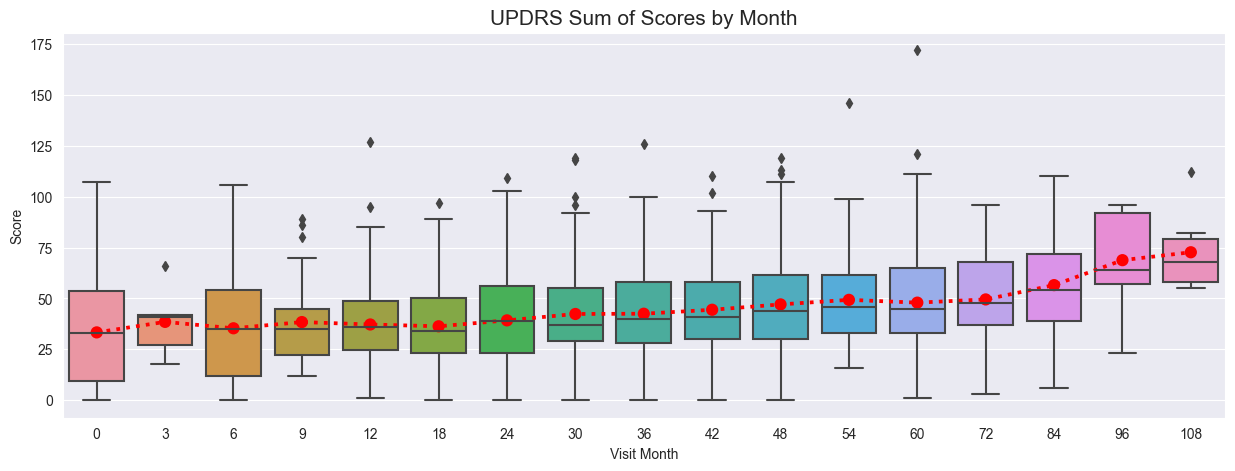

In [28]:
train_clinical_data["updrs_sum"] = train_clinical_data["updrs_1"] + train_clinical_data["updrs_2"] + train_clinical_data["updrs_3"] + train_clinical_data["updrs_4"]
train_clincial_data_copy = train_clinical_data.copy()
train_clincial_data_copy["upd23b_clinical_state_on_medication"] = train_clincial_data_copy["upd23b_clinical_state_on_medication"].fillna("Off")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

sns.set_style('darkgrid')

_ = sns.boxplot(data=train_clincial_data_copy, x="visit_month", y="updrs_sum", ax=ax)
_ = sns.pointplot(data=train_clincial_data_copy, x="visit_month", y="updrs_sum", color="r", ci=None, linestyles=[":"], ax=ax)
_ = ax.set_title("UPDRS Sum of Scores by Month", fontsize=15)
_ = ax.set_xlabel("Visit Month")
_ = ax.set_ylabel("Score")

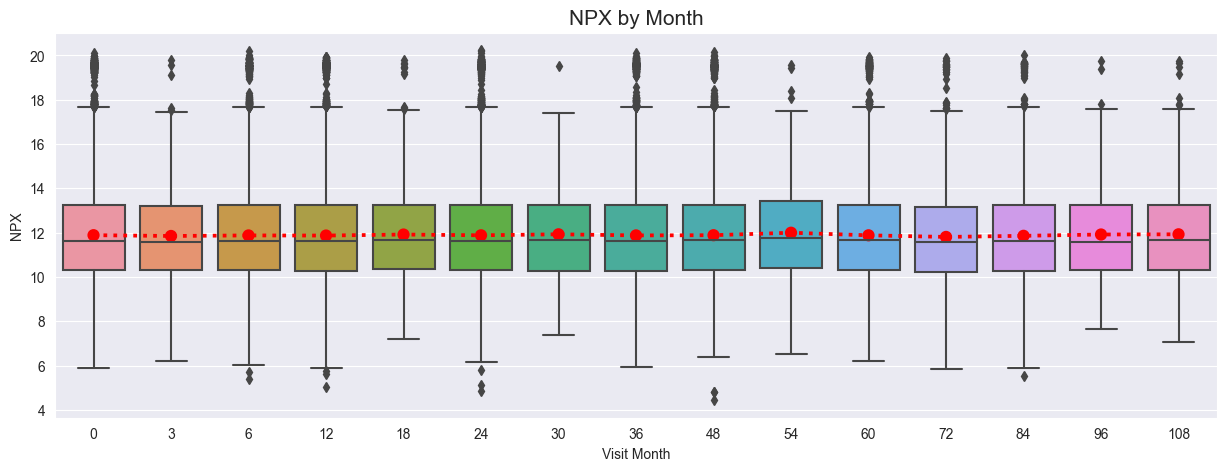

In [29]:
train_protiens_copy = train_protiens.copy()
train_protiens_copy["log_NPX"] = np.log(train_protiens_copy["NPX"])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

sns.set_style('darkgrid')

_ = sns.boxplot(data=train_protiens_copy, x="visit_month", y="log_NPX", ax=ax)
_ = sns.pointplot(data=train_protiens_copy, x="visit_month", y="log_NPX", color="r", ci=None, linestyles=[":"], ax=ax)
_ = ax.set_title("NPX by Month", fontsize=15)
_ = ax.set_xlabel("Visit Month")
_ = ax.set_ylabel("NPX")

In [30]:
unique_proteins = train_protiens["UniProt"].unique()
unique_months = train_protiens["visit_month"].unique()

protein_dict = dict()
for protein in unique_proteins:
    if protein not in protein_dict:
        protein_dict[protein] = {
            "months": unique_months,
            "count_NPX": [train_protiens[(train_protiens["UniProt"] == protein) & (train_protiens["visit_month"] == month)]["NPX"].count() for month in unique_months],
            "total_NPX": [train_protiens[(train_protiens["UniProt"] == protein) & (train_protiens["visit_month"] == month)]["NPX"].sum() for month in unique_months],
            "avg_NPX": [0 * len(unique_months)],
        }
        
for protein in unique_proteins:
    protein_dict[protein]["avg_NPX"] = [float(total) / count for total, count in zip(protein_dict[protein]["total_NPX"], protein_dict[protein]["count_NPX"])]
    
for protein in unique_proteins:
    protein_dict[protein]["min_NPX"] = min(protein_dict[protein]["avg_NPX"])
    protein_dict[protein]["max_NPX"] = max(protein_dict[protein]["avg_NPX"])
    
for protein in unique_proteins:
    protein_dict[protein]["mean"] = sum(protein_dict[protein]["avg_NPX"]) / len(protein_dict[protein]["months"])
    protein_dict[protein]["std"] = sum([(total_NPX - protein_dict[protein]["mean"]) ** 2 for total_NPX in protein_dict[protein]["avg_NPX"]]) / (len(unique_months) - 1)
    protein_dict[protein]["std"] = protein_dict[protein]["std"] ** 0.5
    
proteins_with_large_std = [protein for protein in unique_proteins if protein_dict[protein]["std"] > (protein_dict[protein]["mean"] * .25)]

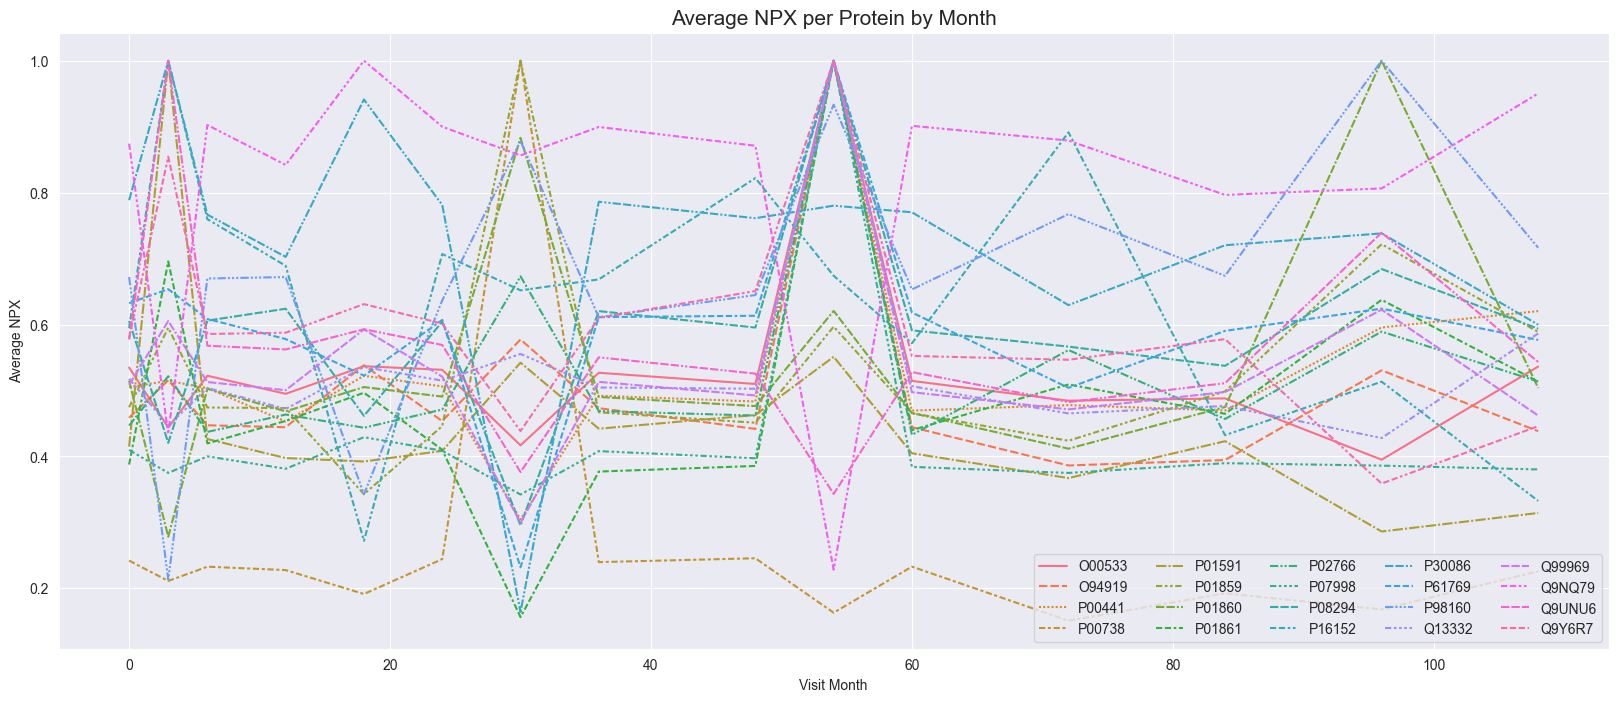

In [31]:
import math

proteins_of_interest_by_month = {
    "UniProt": [],
    "Visit Month": [],
    "Average NPX": [],
}
for protein in proteins_with_large_std:
    for month_index, month in enumerate(unique_months):
        proteins_of_interest_by_month["UniProt"].append(protein)
        proteins_of_interest_by_month["Visit Month"].append(month)
        value = protein_dict[protein]["avg_NPX"][month_index]
        value /= protein_dict[protein]["max_NPX"]
        proteins_of_interest_by_month["Average NPX"].append(value)
        
df = pd.DataFrame(proteins_of_interest_by_month)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 8))

sns.set_style('darkgrid')

_ = sns.lineplot(data=df, x="Visit Month", y="Average NPX", hue="UniProt", style="UniProt", ax=ax)
_ = ax.set_title("Average NPX per Protein by Month", fontsize=15)
_ = ax.set_xlabel("Visit Month")
_ = ax.set_ylabel("Average NPX")
_ = plt.legend(ncol=5)

In [32]:
proteins = []
protein_dict = {}
for index, row in train_protiens.iterrows():
    protein = row["UniProt"]
    if protein not in protein_dict:
        protein_dict[protein] = {}
        proteins.append(protein)
    protein_dict[protein][row["visit_id"]] = row["NPX"]
    
peptides = []
peptide_dict = {}
for index, row in train_peptides.iterrows():
    peptide = row["Peptide"]
    if peptide not in peptide_dict:
        peptide_dict[peptide] = {}
        peptides.append(peptide)
    peptide_dict[peptide][row["visit_id"]] = row["PeptideAbundance"]
    
train_copy = train_clinical_data.copy()
for protein in proteins:
    train_copy[protein] = train_copy["visit_id"].apply(lambda visit_id: 0 if visit_id not in protein_dict[protein] else protein_dict[protein][visit_id])
    
for peptide in peptides:
    train_copy[peptide] = train_copy["visit_id"].apply(lambda visit_id: 0 if visit_id not in peptide_dict[peptide] else peptide_dict[peptide][visit_id])

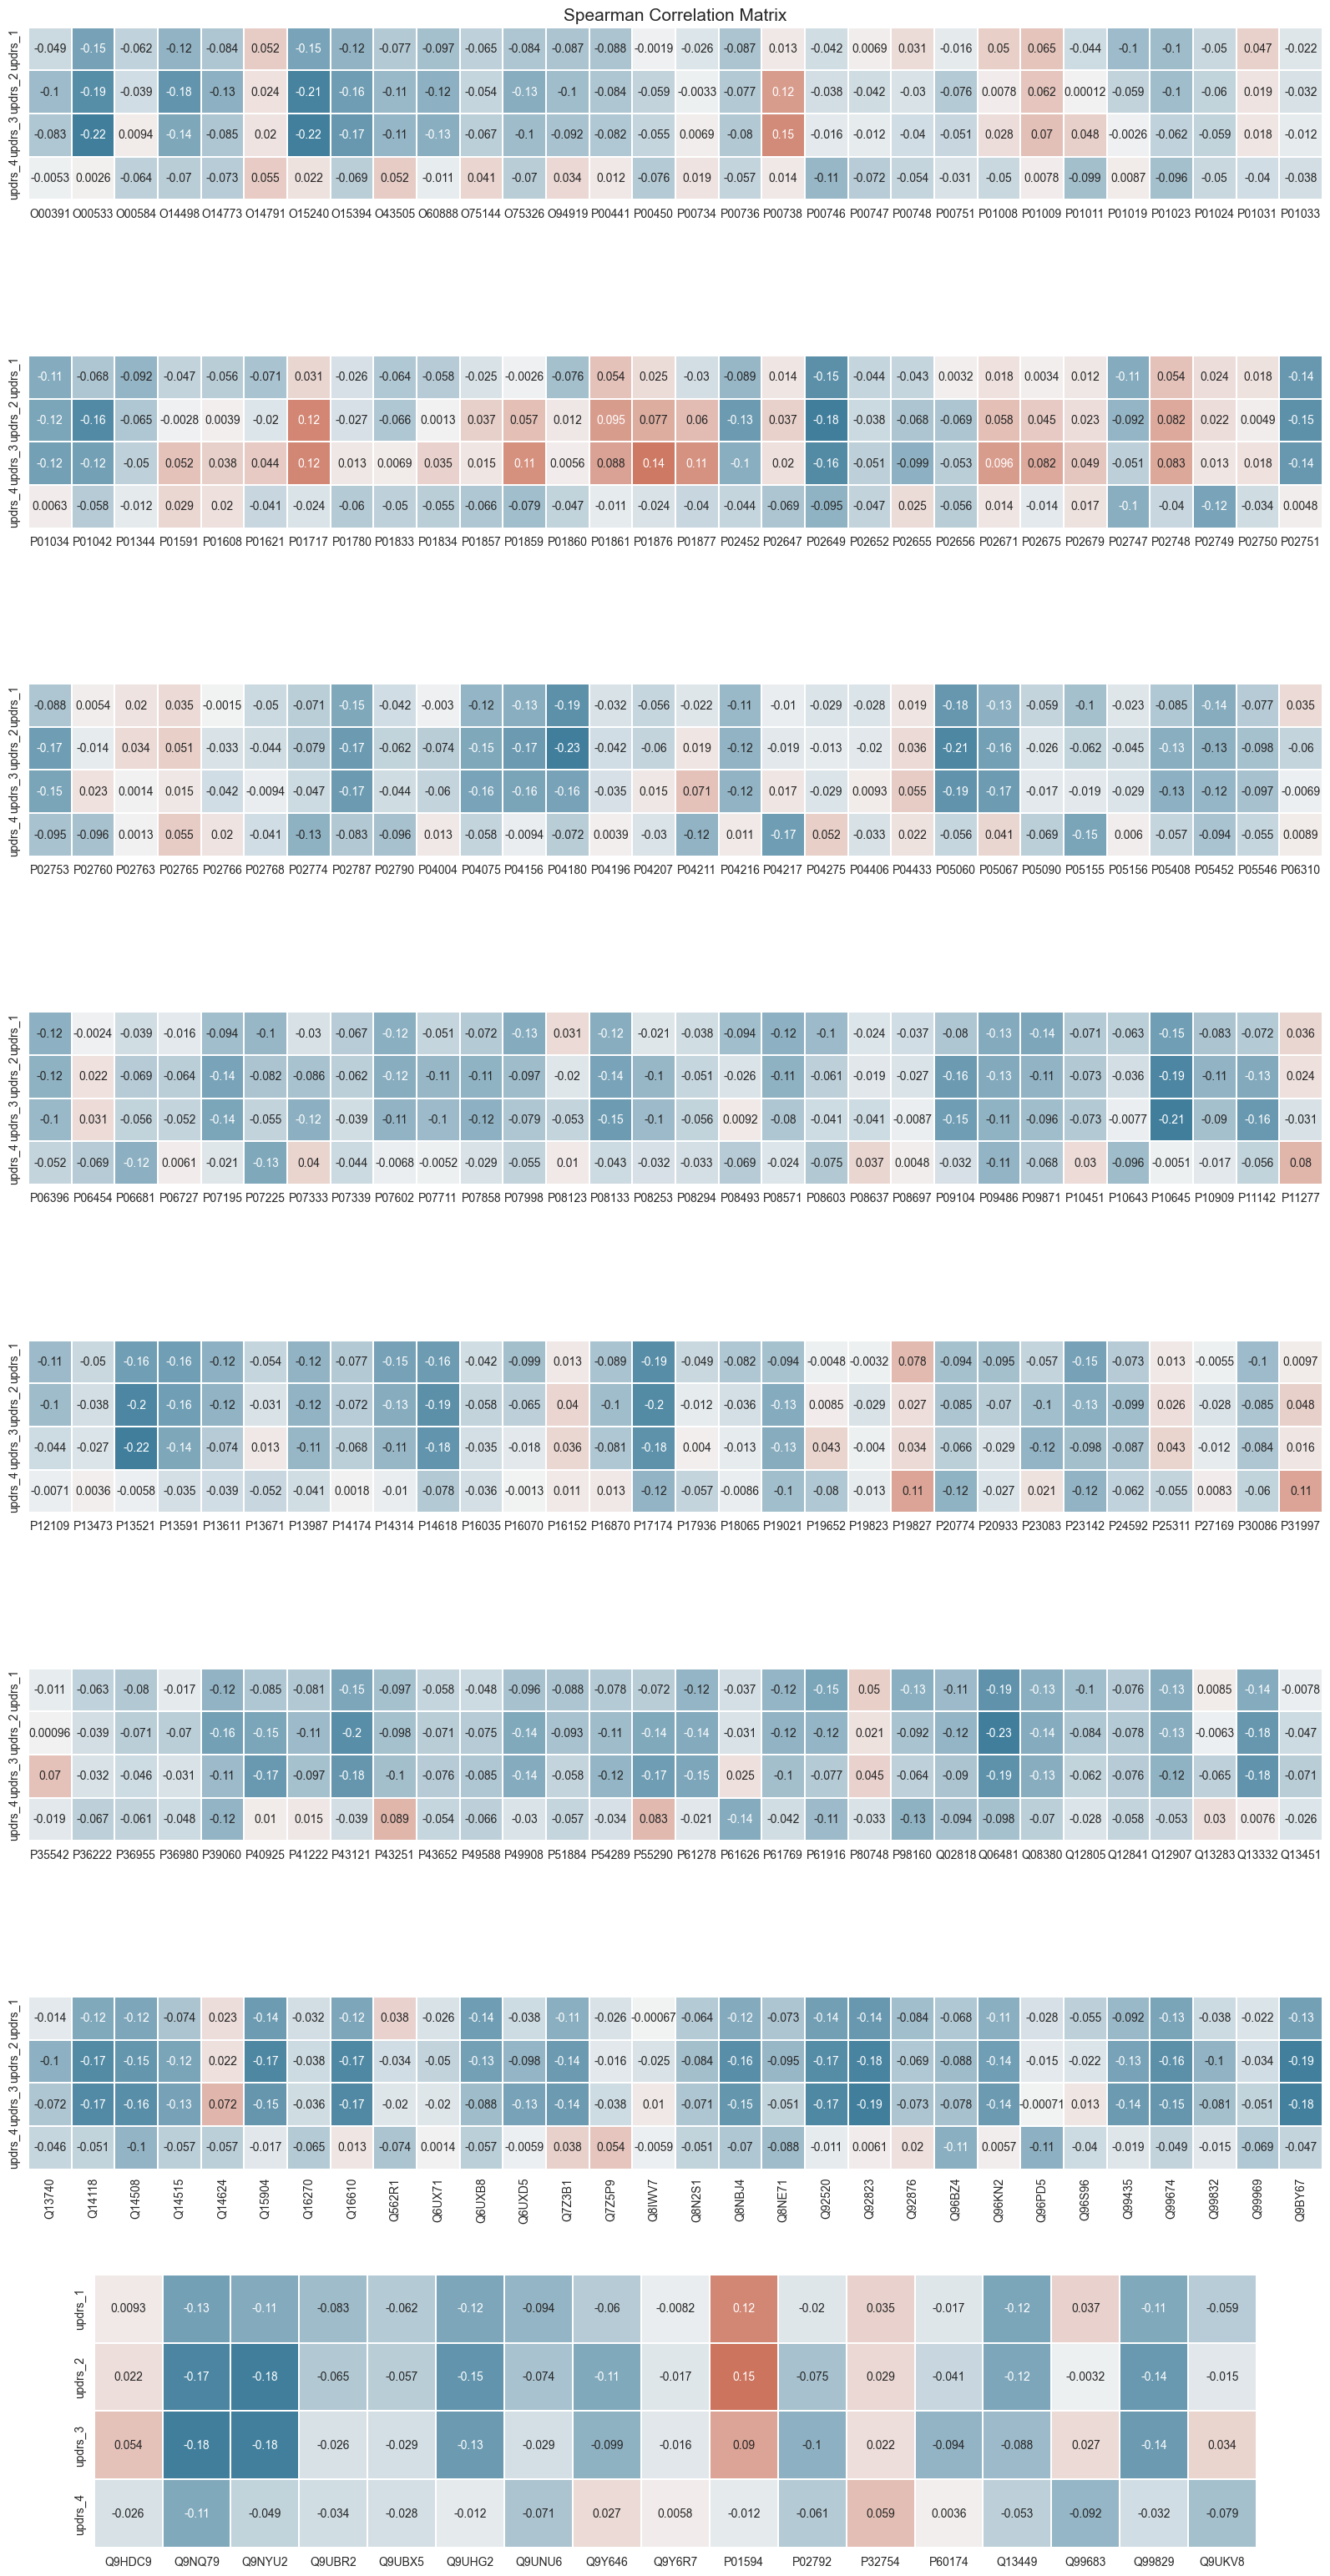

In [33]:
features = []
features.extend(proteins)
# features.extend(peptides)

# Set missing values to null so our correlation matrix won't include 0 values in the correlation calculation
train_copy[features] = train_copy[features].replace(0.0, np.nan)

features.extend(["updrs_1", "updrs_2", "updrs_3", "updrs_4"])

correlation_matrix = train_copy[features].corr(method="spearman")

from matplotlib.colors import SymLogNorm

fig, axs = plt.subplots(nrows=8, ncols=1, figsize=(20, 40))

axs = axs.flatten()

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,0:30],
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[0], annot=True,
)
_ = axs[0].set_title("Spearman Correlation Matrix", fontsize=15)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,30:60],
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[1], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,60:90],
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[2], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,90:120],
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[3], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,120:150],
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[4], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,150:180],
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[5], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,180:210],
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[6], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,210:227],
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[7], annot=True,
)


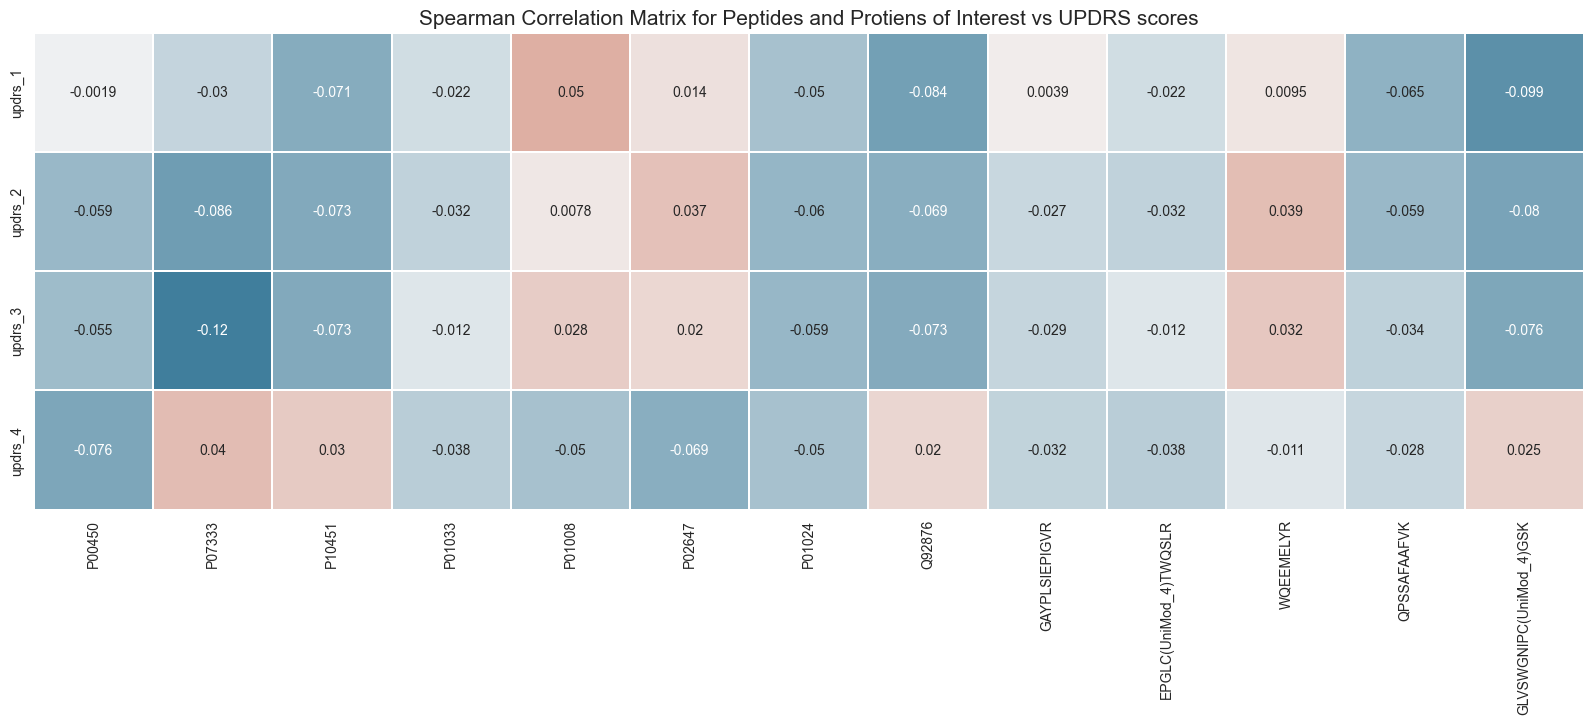

In [34]:
proteins = ["P00450", "P07333", "P10451", "P01033", "P01008", "P02647", "P01024", "Q92876"]
peptides = ["GAYPLSIEPIGVR", "EPGLC(UniMod_4)TWQSLR", "WQEEMELYR", "QPSSAFAAFVK", "GLVSWGNIPC(UniMod_4)GSK"]

protein_dict = {}
for index, row in train_protiens.iterrows():
    protein = row["UniProt"]
    if protein not in protein_dict:
        protein_dict[protein] = {}
    protein_dict[protein][row["visit_id"]] = row["NPX"]
    
peptide_dict = {}
for index, row in train_peptides.iterrows():
    peptide = row["Peptide"]
    if peptide not in peptide_dict:
        peptide_dict[peptide] = {}
    peptide_dict[peptide][row["visit_id"]] = row["PeptideAbundance"]
    
train_copy = train_clinical_data.copy()
for protein in proteins:
    train_copy[protein] = train_copy["visit_id"].apply(lambda visit_id: 0 if visit_id not in protein_dict[protein] else protein_dict[protein][visit_id])
    
for peptide in peptides:
    train_copy[peptide] = train_copy["visit_id"].apply(lambda visit_id: 0 if visit_id not in peptide_dict[peptide] else peptide_dict[peptide][visit_id])
    
features = []
features.extend(proteins)
features.extend(peptides)

# Set missing values to null so our correlation matrix won't include 0 values in the correlation calculation
train_copy[features] = train_copy[features].replace(0.0, np.nan)

features.extend(["updrs_1", "updrs_2", "updrs_3", "updrs_4"])

correlation_matrix = train_copy[features].corr(method="spearman")

from matplotlib.colors import SymLogNorm

f, ax = plt.subplots(figsize=(20, 20))
_ = sns.heatmap(
    correlation_matrix.iloc[13:17,0:13], 
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0,
    square=True, 
    linewidths=.1, 
    cbar=False,
    ax=ax,
    annot=True,
)
_ = ax.set_title("Spearman Correlation Matrix for Peptides and Protiens of Interest vs UPDRS scores", fontsize=15)
